In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
df =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [6]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
143,2636-SJDOU,Male,0,No,No,64,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,One year,Yes,Credit card (automatic),84.30,5289.05,No
2112,8383-SGHJU,Female,0,No,No,33,Yes,Yes,DSL,Yes,...,No,Yes,No,No,One year,No,Electronic check,59.40,1952.8,No
394,3951-NJCVI,Female,1,Yes,No,42,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.05,3944.5,No
3700,5616-PRTNT,Male,0,No,Yes,20,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.40,374.5,Yes
1477,5469-CTCWN,Male,0,Yes,Yes,61,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,One year,Yes,Electronic check,106.00,6547.7,Yes


In [7]:
df.drop('customerID',axis='columns',inplace=True)

In [8]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [9]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

,TotalCharges
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


In [10]:
df = df[df.TotalCharges!=' ']
df.TotalCharges = pd.to_numeric(df.TotalCharges)

In [11]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [12]:
tenure_churn_no=df[df.Churn=='No'].tenure
tenure_churn_yes=df[df.Churn=='Yes'].tenure

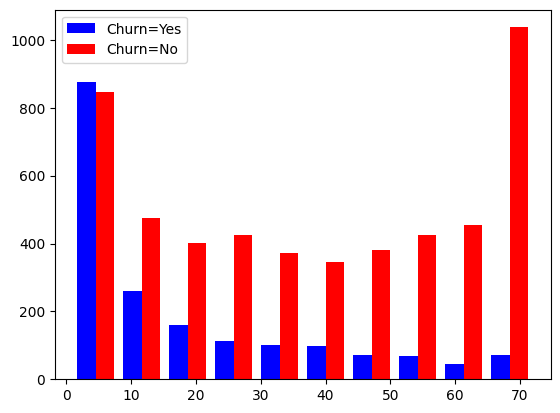

In [13]:
plt.hist([tenure_churn_yes,tenure_churn_no], color=['Blue','red'] ,label=['Churn=Yes','Churn=No'])
plt.legend()

In [14]:
#to check Unique values

def print_unique_col_values(df):
  for col in df:
    if df[col].dtypes=='object':
      print(f'{col} : {df[col].unique()}')


In [15]:
print_unique_col_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [16]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [17]:
print_unique_col_values(df)


gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [18]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [19]:
for col in yes_no_columns:
  df[col].replace({'Yes':1,'No':0},inplace=True)

<ipython-input-19-303ed81af661>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({'Yes':1,'No':0},inplace=True)
<ipython-input-19-303ed81af661>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].replace({'Yes':1,'No':0},inplace=True)


In [21]:
for col in df:
  print(f'{col} : {df[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [22]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)

<ipython-input-22-7f2ac4c24de4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace({'Female':1,'Male':0},inplace=True)
<ipython-input-22-7f2ac4c24de4>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'].replace({'Female':1,'Male':0},inplace=True)


In [23]:
df['gender'].unique()

array([1, 0])

In [28]:
pd.get_dummies(data=df,columns=['InternetService'])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,1,0,1,0,0,0,1,0,...,0,Month-to-month,1,Electronic check,29.85,29.85,0,True,False,False
1,0,0,0,0,34,1,0,1,0,1,...,0,One year,0,Mailed check,56.95,1889.50,0,True,False,False
2,0,0,0,0,2,1,0,1,1,0,...,0,Month-to-month,1,Mailed check,53.85,108.15,1,True,False,False
3,0,0,0,0,45,0,0,1,0,1,...,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,True,False,False
4,1,0,0,0,2,1,0,0,0,0,...,0,Month-to-month,1,Electronic check,70.70,151.65,1,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,One year,1,Mailed check,84.80,1990.50,0,True,False,False
7039,1,0,1,1,72,1,1,0,1,1,...,1,One year,1,Credit card (automatic),103.20,7362.90,0,False,True,False
7040,1,0,1,1,11,0,0,1,0,0,...,0,Month-to-month,1,Electronic check,29.60,346.45,0,True,False,False
7041,0,1,1,0,4,1,1,0,0,0,...,0,Month-to-month,1,Mailed check,74.40,306.60,1,False,True,False


In [29]:
df2=pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'])

In [31]:
df2.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64


In [32]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [33]:

X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [35]:
X_train.shape

(5625, 26)

In [36]:
X_test.shape

(1407, 26)

In [37]:
len(X_train.columns)

26

In [38]:
import tensorflow as tf
from tensorflow import keras

In [40]:
model=keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)


Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7248 - loss: 0.5672
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8030 - loss: 0.4203
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8018 - loss: 0.4194
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8119 - loss: 0.4000
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8076 - loss: 0.4095
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8142 - loss: 0.4045
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8145 - loss: 0.4007
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8174 - loss: 0.3955
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8171 - loss: 0.4028
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8071 - loss: 0.4027
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8115 - loss: 0.4040
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

In [41]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7719 - loss: 0.4597


[0.4803279936313629, 0.7654584050178528]

In [42]:
yp=model.predict(X_test)
yp[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.39433238],
       [0.62913203],
       [0.01332116],
       [0.8826914 ],
       [0.63533217]], dtype=float32)

In [43]:
y_pred=[]
for element in yp:
  if element>0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [44]:
y_pred[:10]

[0, 1, 0, 1, 1, 1, 0, 0, 0, 0]

In [45]:
y_test[:10]

,Churn
2660,0
744,0
5579,1
64,1
3287,1
816,1
2670,0
5920,0
1023,0
6087,0


In [46]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       999
           1       0.61      0.51      0.56       408

    accuracy                           0.77      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.76      0.77      0.76      1407



Text(95.72222222222221, 0.5, 'Truth')

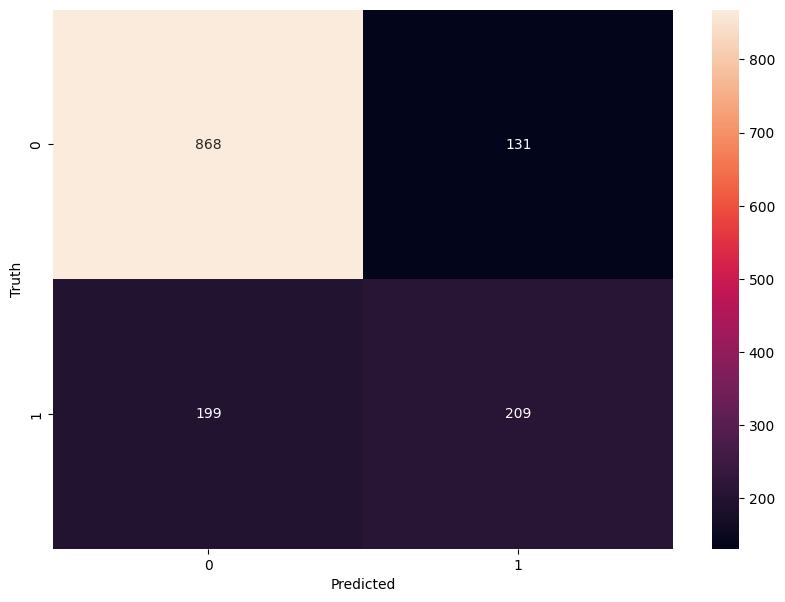

In [47]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')